# 1. Import neceesary library

In [1]:
import pandas as pd
import numpy as np
import glob
import geopandas
import matplotlib.pyplot as plt

# 2. Read all files

a. Crime data files 
<br> 
<br>- Data sources: https://data.police.uk/data/
<br>
<br>- Crime data reported by all forces from Sep 2024 to Aug 2025 

In [31]:
all_files = glob.glob('**/*.csv', recursive=True)

dfs = []

if not all_files:
    print("Warning: No CSV files were found in any sub-folders.")
else:
    print(f"Found {len(all_files)} files to read.")
    for filename in all_files:
        print(f"Reading: {filename}")
        df = pd.read_csv(filename)
        dfs.append(df)

Found 518 files to read.
Reading: raw_data\2024-09\2024-09-avon-and-somerset-street.csv
Reading: raw_data\2024-09\2024-09-bedfordshire-street.csv
Reading: raw_data\2024-09\2024-09-btp-street.csv
Reading: raw_data\2024-09\2024-09-cambridgeshire-street.csv
Reading: raw_data\2024-09\2024-09-cheshire-street.csv
Reading: raw_data\2024-09\2024-09-city-of-london-street.csv
Reading: raw_data\2024-09\2024-09-cleveland-street.csv
Reading: raw_data\2024-09\2024-09-cumbria-street.csv
Reading: raw_data\2024-09\2024-09-derbyshire-street.csv
Reading: raw_data\2024-09\2024-09-devon-and-cornwall-street.csv
Reading: raw_data\2024-09\2024-09-dorset-street.csv
Reading: raw_data\2024-09\2024-09-durham-street.csv
Reading: raw_data\2024-09\2024-09-dyfed-powys-street.csv
Reading: raw_data\2024-09\2024-09-essex-street.csv
Reading: raw_data\2024-09\2024-09-gloucestershire-street.csv
Reading: raw_data\2024-09\2024-09-gwent-street.csv
Reading: raw_data\2024-09\2024-09-hampshire-street.csv
Reading: raw_data\2024-0

Concatenates all files into crime data frame (cdf)

In [32]:
cdf = pd.concat(dfs)
cdf

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,d83930305b75e07a70f9751a24613ec1a2831d55dfe9d9...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-0.530916,50.817041,On or near Thorncroft Road,E01031409,Arun 009C,Violence and sexual offences,Status update unavailable,NaN
1,66e655aeb1ea5dd2659bfebd8b1ace7c0637ba677f5cb3...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-0.229029,51.577574,On or near Nicoll Place,E01000310,Barnet 034C,Vehicle crime,Status update unavailable,NaN
2,NaN,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.508867,51.416147,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
3,b69cb28b05dfa712bada7844b95be5b4718c71e493d78e...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491928,51.424186,On or near Octavius Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Unable to prosecute suspect,NaN
4,6135a715e16ed6a9396dc41c2475eea2e73559fc1fce2b...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.510162,51.410998,On or near Monmouth Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4530,1cf2d7ced9e507dd061ca699c5e36b5b5cfddb225e657f...,2025-08,Wiltshire Police,Wiltshire Police,-1.661154,51.234168,On or near Supermarket,E01034558,Wiltshire 066E,Violence and sexual offences,Unable to prosecute suspect,NaN
4531,66af91cdc529df714ef436a2fb18fdcd765297d883c699...,2025-08,Wiltshire Police,Wiltshire Police,-1.662679,51.225342,On or near Talavera Way,E01034558,Wiltshire 066E,Violence and sexual offences,Under investigation,NaN
4532,3e64eb77948e8be86e5f9d22a7a4e6c47c2d119e2626a5...,2025-08,Wiltshire Police,Wiltshire Police,-1.661154,51.234168,On or near Supermarket,E01034558,Wiltshire 066E,Violence and sexual offences,Investigation complete; no suspect identified,NaN
4533,37ece6856632eb30ee56771fc8d3117292189f00e5e7f9...,2025-08,Wiltshire Police,Wiltshire Police,-1.660447,51.227008,On or near Medicina Street,E01034558,Wiltshire 066E,Violence and sexual offences,Under investigation,NaN


b. UK's boundaries data file (ukb)
<br> 
<br>- Data sources: https://geoportal.statistics.gov.uk/datasets/b976e08d5c894df3901963469bd4f84f_0/explore?showTable=true

In [30]:
ukb = geopandas.read_file("C:/ukmap/ukmap.shp")

ukb

,FID,LSOA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,LSOA21CD_1,RUC21CD,RUC21NM,Urban_rura,Shape_Leng,Shape__Are,Shape__Len,geometry
0,1,E01000001,City of London 001A,None,532123,181632,51.5182,-0.097150,3478c558-3297-4e2b-979e-e29dd9ff3bf5,E01000001,UN1,Urban: Nearer to a major town or city,Urban,1685.391557,1.577948e+05,1685.391557,"POLYGON ((532282.63 181906.496, 532248.249 181..."
1,2,E01000002,City of London 001B,None,532480,181715,51.5188,-0.091970,f2072109-b1ae-426c-b166-083cc32f1789,E01000002,UN1,Urban: Nearer to a major town or city,Urban,1804.827316,1.648821e+05,1804.827316,"POLYGON ((532746.813 181786.891, 532248.249 18..."
2,3,E01000003,City of London 001C,None,532239,182033,51.5217,-0.095330,a9009c33-9b6b-4230-ba62-fc3264806de4,E01000003,UN1,Urban: Nearer to a major town or city,Urban,909.253080,4.221605e+04,909.253080,"POLYGON ((532293.112 182068.355, 532419.592 18..."
3,4,E01000005,City of London 001E,None,533581,181283,51.5147,-0.076280,86aee0aa-079f-4f92-8f9d-5773824f4945,E01000005,UN1,Urban: Nearer to a major town or city,Urban,2028.716721,2.127007e+05,2028.716721,"POLYGON ((533604.265 181418.14, 533743.704 181..."
4,5,E01000006,Barking and Dagenham 016A,None,544994,184274,51.5387,0.089317,c33f1f5b-6b15-47a1-b046-b6a148a9f6d3,E01000006,UN1,Urban: Nearer to a major town or city,Urban,1716.731235,1.305512e+05,1716.731235,"POLYGON ((545271.849 184184.053, 545296.239 18..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35667,35668,W01002036,Vale of Glamorgan 005G,Bro Morgannwg 005G,317939,172435,51.4449,-3.182180,f79ed9c6-8220-49d9-9a69-e80e9f0007cb,W01002036,UN1,Urban: Nearer to a major town or city,Urban,2800.544728,4.411147e+05,2800.544728,"POLYGON ((318294.782 172660.827, 318351 172170..."
35668,35669,W01002037,Vale of Glamorgan 005H,Bro Morgannwg 005H,318527,172406,51.4448,-3.173710,fdd8e9dc-8504-4955-aa8d-e4cff563ed76,W01002037,UN1,Urban: Nearer to a major town or city,Urban,2088.259479,2.321998e+05,2088.259479,"POLYGON ((319033.579 172604.209, 318656.895 17..."
35669,35670,W01002038,Vale of Glamorgan 014G,Bro Morgannwg 014G,306491,167360,51.3975,-3.345520,7b56d7b1-48e6-4883-a46e-3bd00345bc8c,W01002038,RLF1,Larger rural: Further from a major town or city,Rural,10460.433787,3.496360e+06,10460.433787,"POLYGON ((306621.637 166496.871, 306209.782 16..."
35670,35671,W01002039,Vale of Glamorgan 014H,Bro Morgannwg 014H,306564,166023,51.3855,-3.344120,36d00276-9970-4f4b-9322-5b89fdacf0c3,W01002039,RLF1,Larger rural: Further from a major town or city,Rural,3094.046530,5.819288e+05,3094.046530,"POLYGON ((307138.404 165707.568, 306934.985 16..."


c. UK population data file

# Exploratory Data Analysis and Data Cleaning

In [4]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5948057 entries, 0 to 4534
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
 11  Context                float64
dtypes: float64(3), object(9)
memory usage: 589.9+ MB


In [5]:
print(cdf.isnull().sum())

Crime ID                  982967
Month                          0
Reported by                    0
Falls within                   0
Longitude                  90172
Latitude                   90172
Location                       0
LSOA code                 228370
LSOA name                 228370
Crime type                     0
Last outcome category    1076561
Context                  5948057
dtype: int64


In [6]:
df = cdf.dropna(subset=['Crime ID'])
print("Shape of original DataFrame:", cdf.shape)
print("Shape of cleaned DataFrame:", df.shape)
df

Shape of original DataFrame: (5948057, 12)
Shape of cleaned DataFrame: (4965090, 12)


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,d83930305b75e07a70f9751a24613ec1a2831d55dfe9d9...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-0.530916,50.817041,On or near Thorncroft Road,E01031409,Arun 009C,Violence and sexual offences,Status update unavailable,NaN
1,66e655aeb1ea5dd2659bfebd8b1ace7c0637ba677f5cb3...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-0.229029,51.577574,On or near Nicoll Place,E01000310,Barnet 034C,Vehicle crime,Status update unavailable,NaN
3,b69cb28b05dfa712bada7844b95be5b4718c71e493d78e...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491928,51.424186,On or near Octavius Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Unable to prosecute suspect,NaN
4,6135a715e16ed6a9396dc41c2475eea2e73559fc1fce2b...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.510162,51.410998,On or near Monmouth Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,NaN
5,a915c8aff98be766bedf7d25867b0c4ea6317328cfec49...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.510372,51.423406,On or near Durley Lane,E01014399,Bath and North East Somerset 001A,Public order,Status update unavailable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4530,1cf2d7ced9e507dd061ca699c5e36b5b5cfddb225e657f...,2025-08,Wiltshire Police,Wiltshire Police,-1.661154,51.234168,On or near Supermarket,E01034558,Wiltshire 066E,Violence and sexual offences,Unable to prosecute suspect,NaN
4531,66af91cdc529df714ef436a2fb18fdcd765297d883c699...,2025-08,Wiltshire Police,Wiltshire Police,-1.662679,51.225342,On or near Talavera Way,E01034558,Wiltshire 066E,Violence and sexual offences,Under investigation,NaN
4532,3e64eb77948e8be86e5f9d22a7a4e6c47c2d119e2626a5...,2025-08,Wiltshire Police,Wiltshire Police,-1.661154,51.234168,On or near Supermarket,E01034558,Wiltshire 066E,Violence and sexual offences,Investigation complete; no suspect identified,NaN
4533,37ece6856632eb30ee56771fc8d3117292189f00e5e7f9...,2025-08,Wiltshire Police,Wiltshire Police,-1.660447,51.227008,On or near Medicina Street,E01034558,Wiltshire 066E,Violence and sexual offences,Under investigation,NaN


In [7]:
duplicate_id_count = df.duplicated().sum()

print(f"Number of rows with a duplicate Crime ID: {duplicate_id_count}")

df[df.duplicated()].head()

Number of rows with a duplicate Crime ID: 1719


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
12995,7fbbe4ef6b0cd3d540e4ecdf627e44627eca0422a8663e...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.567930,51.508058,On or near Mackie Road,E01014905,South Gloucestershire 018B,Burglary,Status update unavailable,NaN
1081,2f51f6fd9efc0302b2028993a75f08e0a185bb74a2c94f...,2024-09,Humberside Police,Humberside Police,-0.440992,53.740330,On or near Thomlinson Croft,E01013108,East Riding of Yorkshire 028A,Public order,Status update unavailable,NaN
1898,0520a631adbe775dfc039cff92cee95a1f5d29afd7cf61...,2024-09,Humberside Police,Humberside Police,-0.377981,53.788196,On or near Ashton Close,E01012875,Kingston upon Hull 003A,Violence and sexual offences,Status update unavailable,NaN
3430,cbc876a392250444cb96145c3cb3669fff1581e05fccd6...,2024-09,Humberside Police,Humberside Police,-0.354306,53.751962,On or near Peel Street,E01012850,Kingston upon Hull 024A,Violence and sexual offences,Status update unavailable,NaN
3813,4b1f23fe5cd706797b0597c617bb513497eb059be0fcef...,2024-09,Humberside Police,Humberside Police,-0.377238,53.743726,On or near Anlaby Road,E01012864,Kingston upon Hull 027D,Violence and sexual offences,Status update unavailable,NaN


In [8]:
df.drop_duplicates()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,d83930305b75e07a70f9751a24613ec1a2831d55dfe9d9...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-0.530916,50.817041,On or near Thorncroft Road,E01031409,Arun 009C,Violence and sexual offences,Status update unavailable,NaN
1,66e655aeb1ea5dd2659bfebd8b1ace7c0637ba677f5cb3...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-0.229029,51.577574,On or near Nicoll Place,E01000310,Barnet 034C,Vehicle crime,Status update unavailable,NaN
3,b69cb28b05dfa712bada7844b95be5b4718c71e493d78e...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491928,51.424186,On or near Octavius Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Unable to prosecute suspect,NaN
4,6135a715e16ed6a9396dc41c2475eea2e73559fc1fce2b...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.510162,51.410998,On or near Monmouth Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,NaN
5,a915c8aff98be766bedf7d25867b0c4ea6317328cfec49...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.510372,51.423406,On or near Durley Lane,E01014399,Bath and North East Somerset 001A,Public order,Status update unavailable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4530,1cf2d7ced9e507dd061ca699c5e36b5b5cfddb225e657f...,2025-08,Wiltshire Police,Wiltshire Police,-1.661154,51.234168,On or near Supermarket,E01034558,Wiltshire 066E,Violence and sexual offences,Unable to prosecute suspect,NaN
4531,66af91cdc529df714ef436a2fb18fdcd765297d883c699...,2025-08,Wiltshire Police,Wiltshire Police,-1.662679,51.225342,On or near Talavera Way,E01034558,Wiltshire 066E,Violence and sexual offences,Under investigation,NaN
4532,3e64eb77948e8be86e5f9d22a7a4e6c47c2d119e2626a5...,2025-08,Wiltshire Police,Wiltshire Police,-1.661154,51.234168,On or near Supermarket,E01034558,Wiltshire 066E,Violence and sexual offences,Investigation complete; no suspect identified,NaN
4533,37ece6856632eb30ee56771fc8d3117292189f00e5e7f9...,2025-08,Wiltshire Police,Wiltshire Police,-1.660447,51.227008,On or near Medicina Street,E01034558,Wiltshire 066E,Violence and sexual offences,Under investigation,NaN


In [9]:
df['Month'] = pd.to_datetime(df['Month'])

df['Year'] = df['Month'].dt.year
df['Month_Number'] = df['Month'].dt.month

df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21852\1989333685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.to_datetime(df['Month'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21852\1989333685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Month'].dt.year
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21852\1989333685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Year,Month_Number
0,d83930305b75e07a70f9751a24613ec1a2831d55dfe9d9...,2024-09-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-0.530916,50.817041,On or near Thorncroft Road,E01031409,Arun 009C,Violence and sexual offences,Status update unavailable,NaN,2024,9
1,66e655aeb1ea5dd2659bfebd8b1ace7c0637ba677f5cb3...,2024-09-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-0.229029,51.577574,On or near Nicoll Place,E01000310,Barnet 034C,Vehicle crime,Status update unavailable,NaN,2024,9
3,b69cb28b05dfa712bada7844b95be5b4718c71e493d78e...,2024-09-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491928,51.424186,On or near Octavius Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Unable to prosecute suspect,NaN,2024,9
4,6135a715e16ed6a9396dc41c2475eea2e73559fc1fce2b...,2024-09-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.510162,51.410998,On or near Monmouth Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,NaN,2024,9
5,a915c8aff98be766bedf7d25867b0c4ea6317328cfec49...,2024-09-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.510372,51.423406,On or near Durley Lane,E01014399,Bath and North East Somerset 001A,Public order,Status update unavailable,NaN,2024,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530,1cf2d7ced9e507dd061ca699c5e36b5b5cfddb225e657f...,2025-08-01,Wiltshire Police,Wiltshire Police,-1.661154,51.234168,On or near Supermarket,E01034558,Wiltshire 066E,Violence and sexual offences,Unable to prosecute suspect,NaN,2025,8
4531,66af91cdc529df714ef436a2fb18fdcd765297d883c699...,2025-08-01,Wiltshire Police,Wiltshire Police,-1.662679,51.225342,On or near Talavera Way,E01034558,Wiltshire 066E,Violence and sexual offences,Under investigation,NaN,2025,8
4532,3e64eb77948e8be86e5f9d22a7a4e6c47c2d119e2626a5...,2025-08-01,Wiltshire Police,Wiltshire Police,-1.661154,51.234168,On or near Supermarket,E01034558,Wiltshire 066E,Violence and sexual offences,Investigation complete; no suspect identified,NaN,2025,8
4533,37ece6856632eb30ee56771fc8d3117292189f00e5e7f9...,2025-08-01,Wiltshire Police,Wiltshire Police,-1.660447,51.227008,On or near Medicina Street,E01034558,Wiltshire 066E,Violence and sexual offences,Under investigation,NaN,2025,8


# Data Analyzing

In [10]:
df = df.rename(columns={'LSOA code':'LSOA21CD'})

In [11]:
gdf=df.groupby(["LSOA21CD"]).size().reset_index(name='Crime_Count')
gdf

,LSOA21CD,Crime_Count
0,E01000001,171
1,E01000002,404
2,E01000003,114
3,E01000005,759
4,E01000006,80
...,...,...
34332,W01002036,62
34333,W01002037,33
34334,W01002038,88
34335,W01002039,71


In [13]:
gdf['Crime_AVG'] = gdf['Crime_Count'] / 12
gdf

,LSOA21CD,Crime_Count,Crime_AVG
0,E01000001,171,14.250000
1,E01000002,404,33.666667
2,E01000003,114,9.500000
3,E01000005,759,63.250000
4,E01000006,80,6.666667
...,...,...,...
34332,W01002036,62,5.166667
34333,W01002037,33,2.750000
34334,W01002038,88,7.333333
34335,W01002039,71,5.916667


In [ ]:
lsoab_b = lsoab[lsoab['LSOA21NM'].str.contains('Bristol')]

In [16]:
cea = lsoab_b.merge(gdf, how='left', on='LSOA21CD')
cea

,FID,LSOA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,LSOA21CD_1,RUC21CD,RUC21NM,Urban_rura,Shape_Leng,Shape__Are,Shape__Len,geometry,Crime_Count,Crime_AVG
0,13757,E01014485,Bristol 058A,None,360020,174735,51.4702,-2.57698,7e8cac46-569c-4fcc-bc56-170ef96a03ee,E01014485,UN1,Urban: Nearer to a major town or city,Urban,2572.221960,253212.401169,2572.221960,"POLYGON ((360652.878 174591.5, 360501.11 17449...",208,17.333333
1,13758,E01014486,Bristol 058C,None,359924,174186,51.4652,-2.57830,ec4784d2-ac05-45ad-901c-d1c83f09d5ce,E01014486,UN1,Urban: Nearer to a major town or city,Urban,2538.755170,355723.484493,2538.755170,"POLYGON ((360251.997 174372.528, 359808.3 1738...",372,31.000000
2,13759,E01014487,Bristol 020A,None,359244,174738,51.4701,-2.58815,85dd28f4-0a0a-49d4-9b47-473965e6a724,E01014487,UN1,Urban: Nearer to a major town or city,Urban,1913.025610,186568.383068,1913.025610,"POLYGON ((359537 174788, 359336.377 174558.756...",66,5.500000
3,13760,E01014488,Bristol 058B,None,359701,174621,51.4691,-2.58156,f61c0af6-368e-4547-afca-2971ebdd64b6,E01014488,UN1,Urban: Nearer to a major town or city,Urban,1516.005656,130729.677250,1516.005656,"POLYGON ((359808 174686, 359974.482 174587.721...",221,18.416667
4,13761,E01014489,Bristol 059A,None,359346,174262,51.4659,-2.58663,48229343-5f7e-42de-abfe-d32848d2aae7,E01014489,UN1,Urban: Nearer to a major town or city,Urban,1854.126242,198054.890148,1854.126242,"POLYGON ((359628.089 174397.518, 359591 174203...",367,30.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,31948,E01033906,Bristol 060E,None,358098,172466,51.4496,-2.60438,7ef2363b-759f-4fb2-a2e4-1d50e6ea13f4,E01033906,UN1,Urban: Nearer to a major town or city,Urban,815.537450,20203.969124,815.537450,"POLYGON ((358301.337 172423.749, 358173.313 17...",10,0.833333
264,31949,E01033907,Bristol 061A,None,359061,173092,51.4553,-2.59059,91160624-07d9-44dd-a870-595be6308587,E01033907,UN1,Urban: Nearer to a major town or city,Urban,2920.663689,395619.638416,2920.663689,"POLYGON ((359479.897 173282.294, 359512.542 17...",2256,188.000000
265,31950,E01033908,Bristol 061B,None,358771,172657,51.4514,-2.59471,41da3e05-3279-44bf-951a-66eb104aa271,E01033908,UN1,Urban: Nearer to a major town or city,Urban,1499.091328,136857.933205,1499.091328,"POLYGON ((358960.848 172786.276, 358956.053 17...",559,46.583333
266,31951,E01033909,Bristol 061C,None,358350,172797,51.4526,-2.60079,a810a12c-f82f-4bdb-a2c7-19e35ead6899,E01033909,UN1,Urban: Nearer to a major town or city,Urban,2772.477076,305510.982250,2772.477076,"POLYGON ((358607.013 172912.889, 358580 172507...",1197,99.750000


<Axes: >

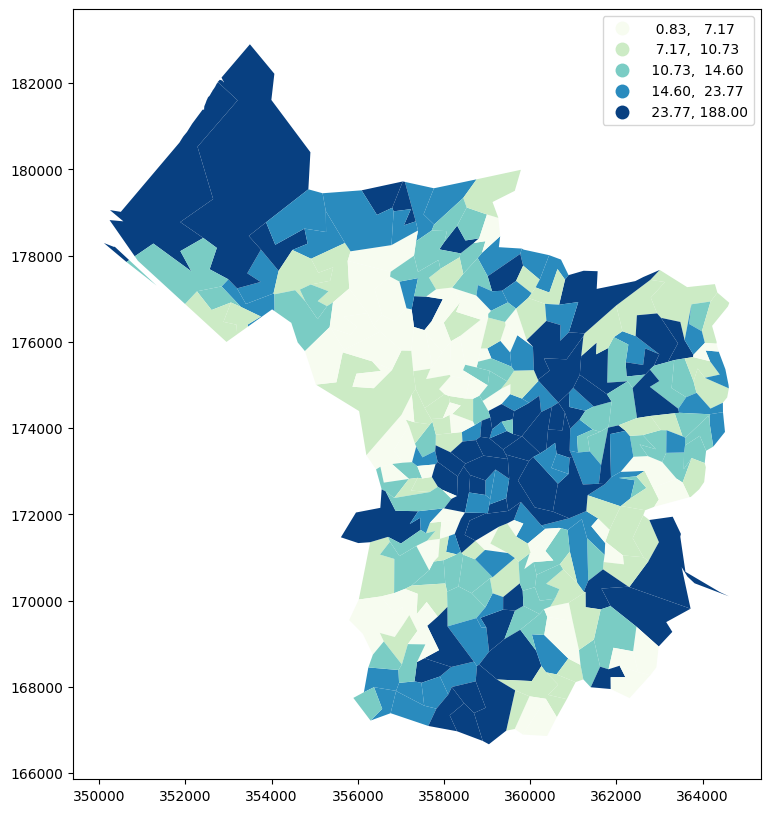

In [22]:
fig, ax = plt.subplots(figsize=(15,10), subplot_kw=dict(aspect='equal'))
cea.plot(column='Crime_AVG', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax)

In [18]:
top10 = cea.nlargest(10,"Crime_AVG")
top10

,FID,LSOA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,LSOA21CD_1,RUC21CD,RUC21NM,Urban_rura,Shape_Leng,Shape__Are,Shape__Len,geometry,Crime_Count,Crime_AVG
264,31949,E01033907,Bristol 061A,None,359061,173092,51.4553,-2.59059,91160624-07d9-44dd-a870-595be6308587,E01033907,UN1,Urban: Nearer to a major town or city,Urban,2920.663689,395619.638416,2920.663689,"POLYGON ((359479.897 173282.294, 359512.542 17...",2256,188.000000
242,31508,E01033342,Bristol 025E,None,359072,173532,51.4593,-2.59048,419de9a4-fa08-4872-955f-42df32c3d250,E01033342,UN1,Urban: Nearer to a major town or city,Urban,1978.956945,211604.600674,1978.956945,"POLYGON ((359057.874 173767.01, 359055.887 173...",1533,127.750000
266,31951,E01033909,Bristol 061C,None,358350,172797,51.4526,-2.60079,a810a12c-f82f-4bdb-a2c7-19e35ead6899,E01033909,UN1,Urban: Nearer to a major town or city,Urban,2772.477076,305510.982250,2772.477076,"POLYGON ((358607.013 172912.889, 358580 172507...",1197,99.750000
250,31516,E01033358,Bristol 054D,None,359704,173503,51.4591,-2.58138,3fbb47bc-7d7c-489e-8a2f-008e0d443efe,E01033358,UN1,Urban: Nearer to a major town or city,Urban,2130.960889,264925.652699,2130.960889,"POLYGON ((360230.886 173415.708, 360071.89 173...",941,78.416667
167,13924,E01014665,Bristol 014D,None,360707,175129,51.4738,-2.56713,a4a71f51-12d1-426f-848c-9b79c2986bc4,E01014665,UN1,Urban: Nearer to a major town or city,Urban,4284.048537,735643.360809,4284.048537,"POLYGON ((361182.057 175669, 361149.601 175236...",821,68.416667
97,13854,E01014588,Bristol 013A,None,362936,176181,51.4834,-2.53515,72f252a4-548a-46ae-baf1-3ef0b2960bc5,E01014588,UN1,Urban: Nearer to a major town or city,Urban,3612.516206,680012.929909,3612.516206,"POLYGON ((363032.575 176558.261, 363426 175966...",808,67.333333
261,31946,E01033904,Bristol 060B,None,358522,173486,51.4588,-2.59840,f2b0003e-44e4-45a1-81a3-6e239829c14b,E01033904,UN1,Urban: Nearer to a major town or city,Urban,1978.974807,252083.097908,1978.974807,"POLYGON ((358915.058 173362.027, 358498.585 17...",746,62.166667
251,31517,E01033359,Bristol 039E,None,359064,171825,51.4439,-2.59040,6689619c-d0b2-4cd2-bed5-33b98754fa7c,E01033359,UN1,Urban: Nearer to a major town or city,Urban,3391.785346,460605.790733,3391.785346,"POLYGON ((359619.252 171869.676, 359465.736 17...",735,61.250000
244,31510,E01033347,Bristol 059D,None,359385,173725,51.4610,-2.58600,b1385b24-e639-44b0-a4fe-b02b6b3fde88,E01033347,UN1,Urban: Nearer to a major town or city,Urban,1731.093630,155166.959167,1731.093630,"POLYGON ((359598.529 173866.661, 359798.051 17...",704,58.666667
226,13983,E01014726,Bristol 053B,None,358061,167258,51.4028,-2.60429,8cc54233-732a-47bb-a702-7b64c9a8b41d,E01014726,UN1,Urban: Nearer to a major town or city,Urban,3059.543547,387224.368080,3059.543547,"POLYGON ((358466 167618, 358132.258 167337.981...",641,53.416667


<Axes: ylabel='LSOA21NM'>

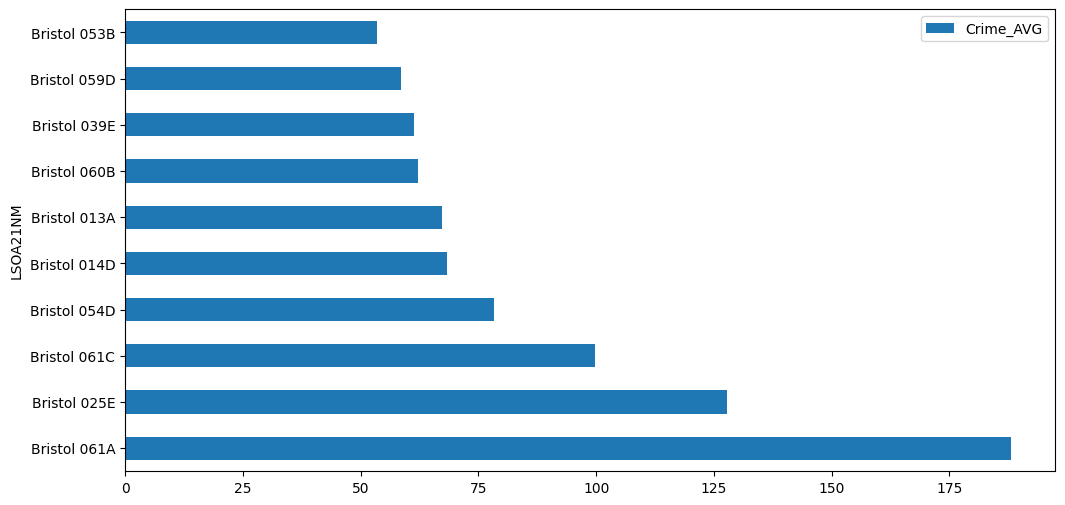

In [20]:
top10.plot.barh(x='LSOA21NM', y='Crime_AVG', figsize=(12, 6))